<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Week4_work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week4授業前課題2　住宅価格の予測

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
#from matplotlib.colors import ListedColormap    # グラフ描写でカラーマップを利用
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale #前処理用
from sklearn.model_selection import train_test_split    # 訓練用とテスト用に分けるメソッド
from sklearn.metrics import accuracy_score  # 正解率の判定機能

In [2]:
# データセット
data = pd.read_csv('/content/drive/My Drive/train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

## **【問題1】練習のために特徴量の選択**
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [3]:
features = ['GrLivArea', 'YearBuilt']
target = ['SalePrice']

X = data[features].values
y = data[target].values

## **【問題2】線形回帰による推定と評価**
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。
可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

In [4]:
# z標準化（平均０、標準偏差1のデータに変換する）
X_std = scale(X)
y_std = scale(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, random_state = 0)

In [6]:
#指標値のリスト
score_list = []

対象の特徴量: ['GrLivArea', 'YearBuilt']
予測ラベル：　['SalePrice']
正解率: 43.222%


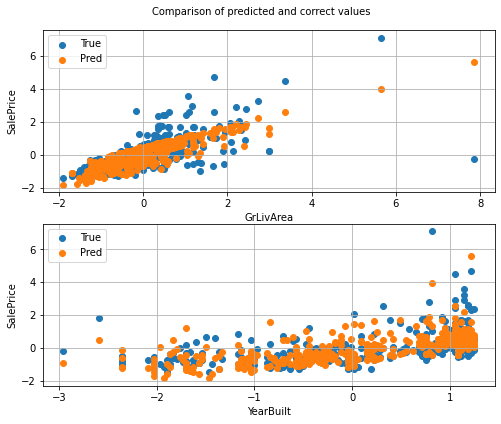

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 平均二乗誤差を算出し可視化も同時に行う
def calc_model(model, features, target):
    # モデルを学習させる
    model.fit(X_train, y_train)
    # X_testに対する予測値
    pred_y = model.predict(X_test)
    # 平均二乗誤差を出す
    score = mean_squared_error(y_test, pred_y)
    score_list.append(score)

    print(f'対象の特徴量: {features}')
    print(f'予測ラベル：　{target}')
    print('正解率: {:.3f}%'.format(score*100))

    fig = plt.figure(figsize=(7, 3*len(features)*0.96))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    fig.tight_layout(rect=[0,0,1,0.96])
    fig.suptitle('Comparison of predicted and correct values', fontsize=10)

    ax1.set_xlabel(features[0])
    ax1.set_ylabel(target[0])
    ax1.grid()
    ax1.scatter(X_test[:, 0], y_test, label='True')
    ax1.scatter(X_test[:, 0], pred_y, label='Pred')
    ax1.legend(loc='upper left')

    ax2.set_xlabel(features[1])
    ax2.set_ylabel(target[0])
    ax2.grid()
    ax2.scatter(X_test[:, 1], y_test, label='True')
    ax2.scatter(X_test[:, 1], pred_y, label='Pred')
    ax2.legend(loc='upper left')

    

lr = LinearRegression()

calc_model(lr, features, target)

正解率が43％なのに散布図で比較するとあまりバラバラに見えないような気もする。

## **【問題3】手法の比較**
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


* 線形回帰
* SVM
* 決定木
* ランダムフォレスト


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


対象の特徴量: ['GrLivArea', 'YearBuilt']
予測ラベル：　['SalePrice']
正解率: 36.290%


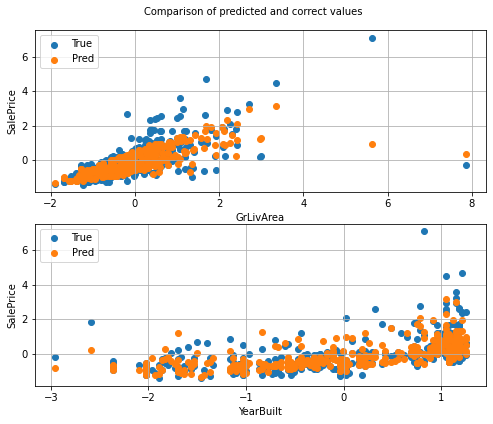

In [8]:
#SVM
from sklearn.svm import SVR

svr = SVR()

calc_model(svr, features, target)

対象の特徴量: ['GrLivArea', 'YearBuilt']
予測ラベル：　['SalePrice']
正解率: 50.491%


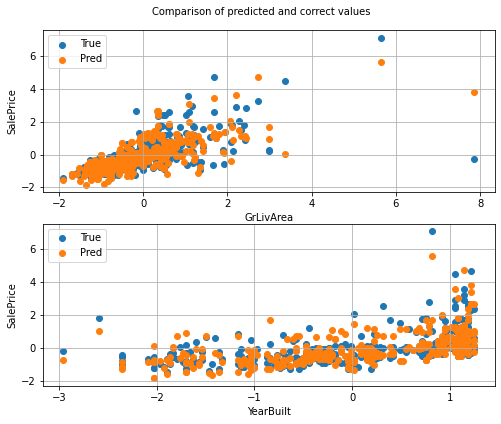

In [9]:
#決定木
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
calc_model(tree, features, target)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


対象の特徴量: ['GrLivArea', 'YearBuilt']
予測ラベル：　['SalePrice']
正解率: 28.962%


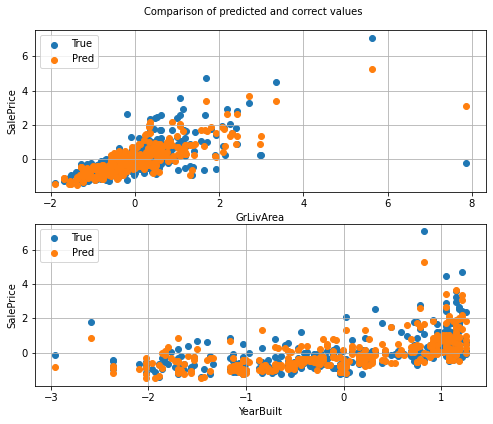

In [10]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
calc_model(forest, features, target)

In [11]:
df_score = pd.DataFrame(score_list,
                        columns=['指標値'],
                        index=['線形回帰', 'SVM', '決定木', 'ランダムフォレスト'])
df_score

,指標値
線形回帰,0.432218
SVM,0.362905
決定木,0.504913
ランダムフォレスト,0.289619


決定木が一番精度が良い。

## **【問題4】（アドバンス課題）他の特徴量も使用しての学習**
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。



In [12]:
features = ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
target = ['SalePrice']

X = data[features].values
y = data[target].values
X_std = scale(X)
y_std = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, random_state = 0)

score_list = []

# 平均二乗誤差を算出し可視化も同時に行う
def calc_model(model, features, target):
    # モデルを学習させる
    model.fit(X_train, y_train)
    # X_testに対する予測値
    pred_y = model.predict(X_test)
    # 平均二乗誤差を出す
    score = mean_squared_error(y_test, pred_y)
    score_list.append(score)

    print(f'対象の特徴量: {features}')
    print(f'予測ラベル：　{target}')
    print('正解率: {:.3f}%'.format(score*100))

    fig = plt.figure(figsize=(7, 5*len(features)*0.96))
    fig.tight_layout()
    fig.suptitle('Comparison of predicted and correct values', fontsize=10)

    for i in range(len(features)):
        ax = plt.subplot(len(features), 1, i+1)
        ax.set_xlabel(features[i])
        ax.set_ylabel(target[0])
        ax.grid()
        ax.scatter(X_test[:, i], y_test, label='True')
        ax.scatter(X_test[:, i], pred_y, label='Pred')
        ax.legend(loc='upper left')



対象の特徴量: ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
予測ラベル：　['SalePrice']
正解率: 42.107%


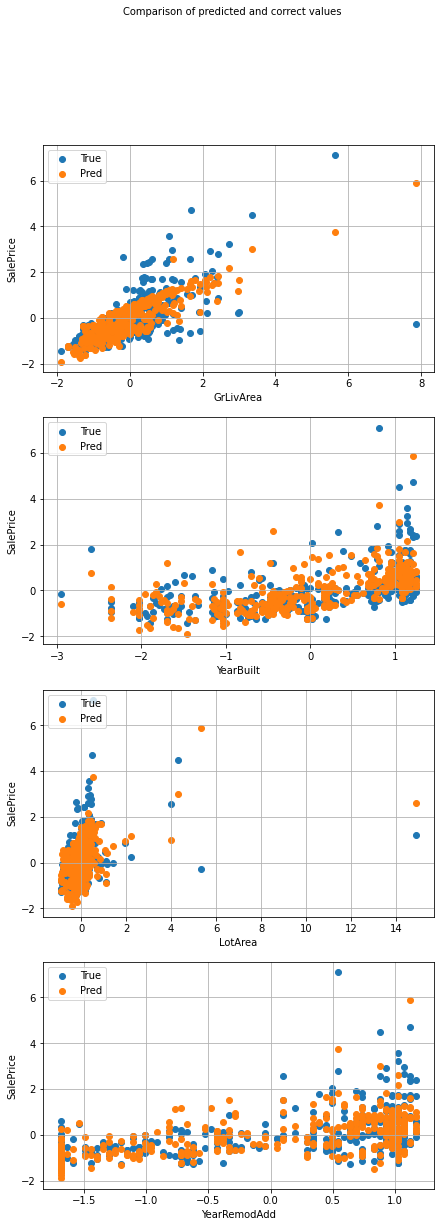

In [13]:
lr = LinearRegression()

calc_model(lr, features, target)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


対象の特徴量: ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
予測ラベル：　['SalePrice']
正解率: 31.357%


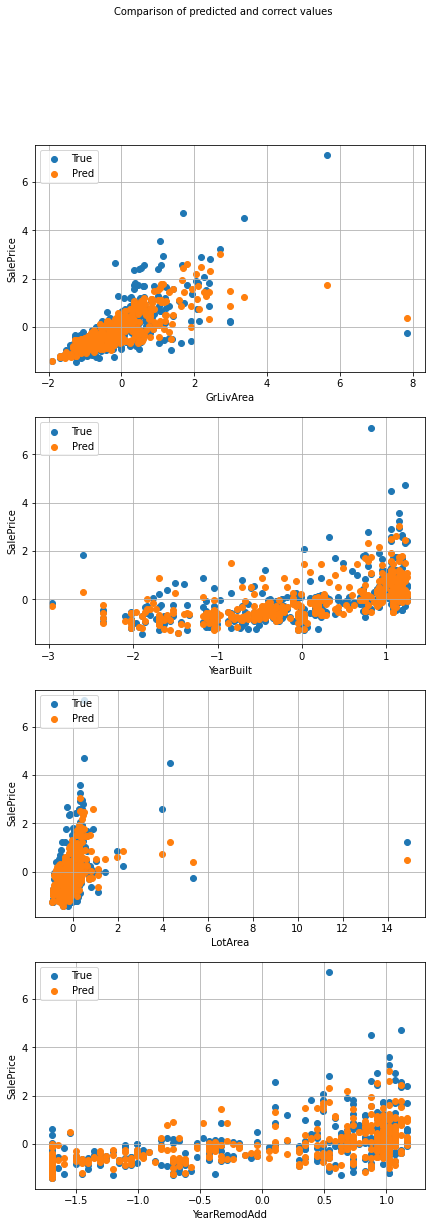

In [14]:
svr = SVR()

calc_model(svr, features, target)

対象の特徴量: ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
予測ラベル：　['SalePrice']
正解率: 40.230%


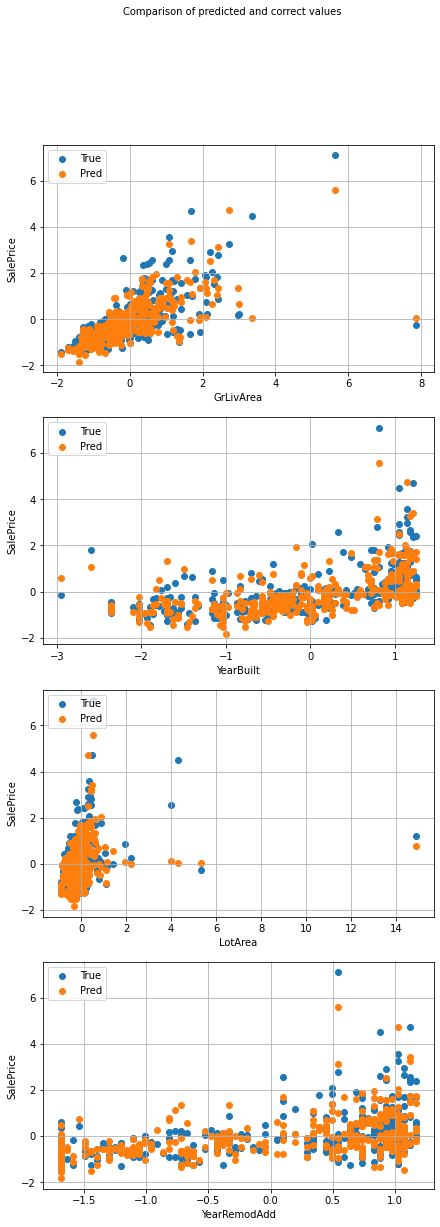

In [15]:
tree = DecisionTreeRegressor()

calc_model(tree, features, target)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


対象の特徴量: ['GrLivArea', 'YearBuilt', 'LotArea', 'YearRemodAdd']
予測ラベル：　['SalePrice']
正解率: 24.325%


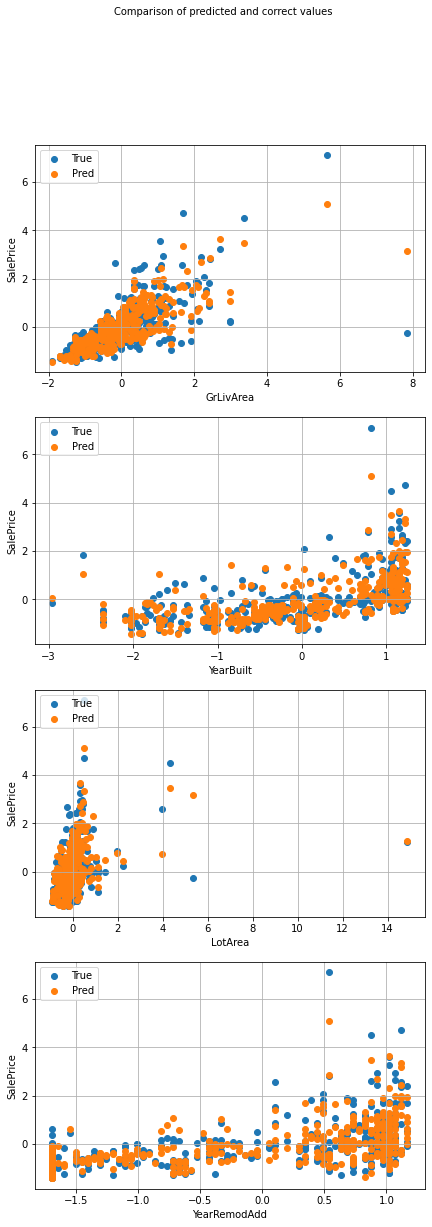

In [16]:
forest = RandomForestRegressor()

calc_model(forest, features, target)

In [17]:
df_score = pd.DataFrame(score_list,
                        columns=['指標値'],
                        index=['線形回帰', 'SVM', '決定木', 'ランダムフォレスト'])
df_score

,指標値
線形回帰,0.421066
SVM,0.313565
決定木,0.402295
ランダムフォレスト,0.243249


特徴量を二つ追加し4つのモデルを試した。全体的に指標値が落ちた。モデル作成時にデフォルトの設定のままだと、説明変数の数が増える度に精度が落ちるのではないか。

## **感想**
テキストの説明が少なく、何を求められているか正直わからないところもあった。いまだにデータ分析の手応えを感じていないため、モチベーションが落ちている自覚がある。